In [59]:
from scipy.stats import chi2, bernoulli
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


In [ ]:
'''
Монах Грегор Иоганн выращивал горох трех цветов (бедняга надеялся, что это поможет ему сделать важное открытие).  
В одном из опытов эмпирическое распределение частот некоторого цвета гороха приняло следующий вид:

18, 55, 2718,55,27

Чему будут равны ожидаемые значения частот, если предполагаемое теоретическое распределение имеет следующий вид:

1: 2: 11:2:1
'''

In [52]:
emp = np.array([18, 55, 27])
teor = np.array([1,2,1])
k = sum(emp) / sum(teor)
ozid = teor * k
ozid

array([25., 50., 25.])

In [ ]:
'''
Эмпирическое распределение частот некоторого номинативного признака с тремя градациями приняло вид
18, 55, 2718,55,27. Предполагаемое теоретическое распределение — 1 : 2 : 11:2:1.

Рассчитайте расстояние хи-квадрат и введите получившееся значение с точностью хотя бы до одной цифры после запятой.
'''

In [57]:
chisquare([18, 55, 27], f_exp=[25, 50, 25])

Power_divergenceResult(statistic=2.62, pvalue=0.26982005638468687)

In [ ]:
'''
Ваши ставки! Как будет выглядеть распределение расстояния хи-квадрат в нашем эксперименте с монеткой при многократном повторении 
эксперимента (при условии, что верна нулевая гипотеза). 

Представьте, что мы при каждом повторении эксперимента рассчитываем расстояние хи - квадрат и в итоге строим гистограмму получившихся 
значений.
'''

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

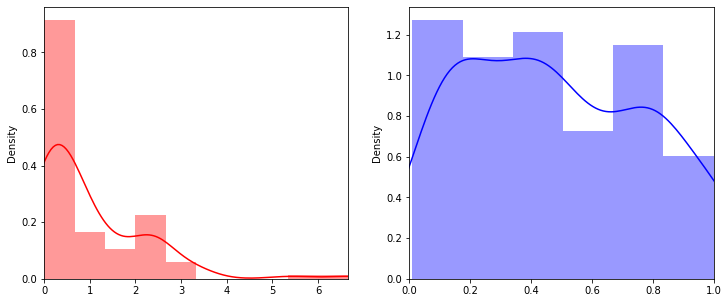

In [12]:
number_of_experiments = 100
number_of_throws = 60
expect = [number_of_throws/2]*2
chi_result = []
p_result = []

for exp in range(number_of_experiments):

    coin_throw = np.random.randint(0,2,number_of_throws)
    result = (np.count_nonzero(coin_throw == 0)
              , np.count_nonzero(coin_throw == 1))
    chi, p_value = chisquare(result, f_exp=expect)
    chi_result.append(chi)
    p_result.append(p_value)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.distplot(chi_result, ax=ax[0], color='red')
ax[0].set_xlim(0, max(chi_result))
sns.distplot(p_result, ax=ax[1], color='blue', bins=6)
ax[1].set_xlim(0, 1)

In [13]:
'''
Напишем функцию подбрасывания монеты 60 раз, считающую сколько раз выпал орел, сколько решка и возвращающую вычисленное 
расстояния хи-квадрат для итога данных подбрасываний:
'''

In [15]:
def distance_chi_square_from_toss_coin():
    eagles = 0
    tails = 0
    # подбрасываем монету 60 раз
    for i in range(60):
        if random.randint(0,1):
            eagles += 1
        else:
            tails += 1
    # расчитываем расстояние хи-квадрат Пирсона: 
    # ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
    return (
        (eagles-30)**2/30 + (tails-30)**2/30
    )

In [16]:
# делаем эксперимент 10 тыс.раз, 
# в каждом из которых по 60 раз будем подбрасывать монету 
# и сохранять возвращаемое значение расстояния хи-квадрат
list_of_chi_square = []
for i in range(10000):
    list_of_chi_square.append(distance_chi_square_from_toss_coin())

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


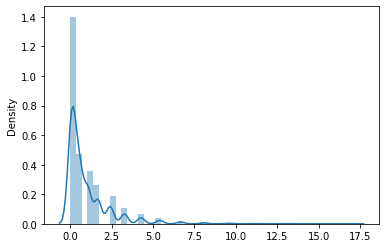

In [36]:
sns.distplot(list_of_chi_square);


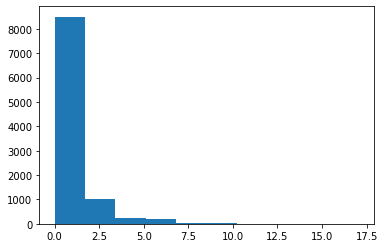

In [18]:
plt.hist(list_of_chi_square);


In [19]:
# посмотрим еще раз на значение, которое мы получали в нашем 
# конкретном наблюдении с выпаданием орла и решки (когда получили 40 орлов!):
exp_eagles = 40
exp_tails = 20
# расчитываем расстояние хи-квадрат Пирсона: 
# ((O1 - E1)|sqrt(E1))^2 + ... + ((On - En)|sqrt(En))^2
res_of_exp_chi_2 = (exp_eagles-30)**2/30 + (exp_tails-30)**2/30
print(res_of_exp_chi_2)

6.666666666666667


In [20]:
# посмотрим % значений с равным или большим значением нашего конкретного наблюдения:
count_of_result_or_more_like_we_see = 0
for i in list_of_chi_square:
    if i >= res_of_exp_chi_2:
        count_of_result_or_more_like_we_see += 1;
print(count_of_result_or_more_like_we_see)

134


In [22]:
# % вероятности получить такие расхождения
print(100 * count_of_result_or_more_like_we_see / len(list_of_chi_square))

1.34


### Или с вероятностью 1.27% мы могли получить такое (40 раз!) выпадение орла при 60-ти подбрасываниях честной монеты.

In [25]:
# стало интересно, а какова вероятность выпадания всех орлов?

In [23]:
res_of_exp_chi_2_60 = (60-30)**2/30 + (0-30)**2/30
print(res_of_exp_chi_2_60)

60.0


In [24]:
count_of_result_60 = 0
for i in list_of_chi_square:
    if i >= res_of_exp_chi_2_60:
        count_of_result_60 += 1;
print(count_of_result_60)

0


In [27]:
# В нашем случайном моделировании из 10 тыс. раз - такой ситуации не встретилось. Не найдем мы ее и среди 1 млн. экспериментов. 
# Но, конечно, вероятность есть ) 

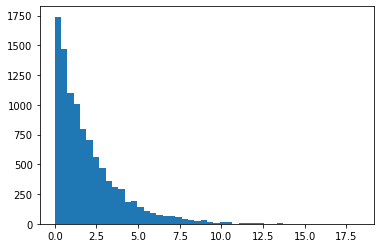

In [28]:
plt.hist(np.array([random.normalvariate(0, 1)**2 + random.normalvariate(0, 1)**2  for _ in range(10000)]), bins=48)
plt.show()

In [30]:
# Вопрос про получение значения 5,9 для количества степеней свободы n= 2 и вероятностью alpha=0.95 
# действительно никак не освящён и это сбивает с толку.

In [69]:
chi2.ppf(df=2, q=0.95)

5.991464547107979

### Распределение хи-квадрат с k степенями свободы - это распределение суммы квадратов k независимых стандартных нормальных случайных величин. 

In [32]:
# Поиграться с распределением и степенями свободы:

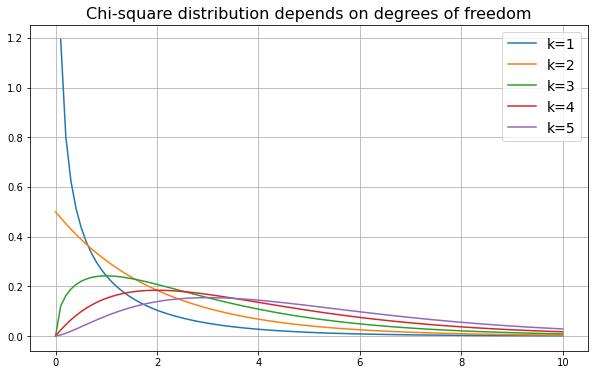

In [66]:
plt.figure(figsize=(10, 6))

df_s = 5

x = np.linspace(0, 10, 100)

for i in range(df_s):
    df = i + 1
    plt.plot(x, chi2.pdf(x, df), label=f'k={df}')
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.title('Сhi-square distribution depends on degrees of freedom', fontsize=16)
plt.grid()
plt.show()

In [45]:
# Пошаговое построение распределения с нуля на Python:

In [43]:
def make_experiment(*, p: float = 0.5, sample_size: int) -> np.ndarray:
    # 0 - решка, 1 - орел
    sample = bernoulli.rvs(p=p, size=sample_size)
    unique, counts = np.unique(sample, return_counts=True)

    emperical_info = dict(zip(unique, counts))
    theoretical_info = {0: int(p*len(sample)), 1: int((1-p)*len(sample))}

    return sample, emperical_info, theoretical_info


def chi_distance(theoretical_info: dict, emperical_info: dict) -> float:
    expected_theoretical_size = theoretical_info[0]

    return np.sum((np.array(list(theoretical_info.values())) - np.array(list(emperical_info.values())))**2) / expected_theoretical_size

def generate_chi_distribution(*, p: float = 0.5, sp_size: int, n_times: int) -> None:
    distances = []
    for n_time in range(n_times):
        # generate a sample
        sample, emperical_info, theoretical_info = make_experiment(p=p, sample_size=sp_size)
        # distance
        chi_dist = chi_distance(theoretical_info, emperical_info)

        distances.append(chi_dist)

    distances = np.array(distances)

    d = pd.DataFrame(distances, columns=['chi_distance'])
    sns.histplot(data=d, x='chi_distance', bins=15)

    return None

# example call
# generate_chi_distribution(p=0.5, sp_size=60, n_times=10000)

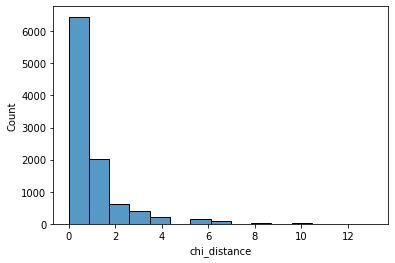

In [44]:
generate_chi_distribution(p=0.5, sp_size=60, n_times=10000)